<a href="https://colab.research.google.com/github/HarishSidagam8/Machine-Learning-Projects/blob/main/Project_17_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
cus_data=pd.read_csv('/content/Customer-Churn.csv')
cus_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cus_data.shape

(7043, 21)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
cus_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cus_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
cus_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
#dropping customerID column
cus_data.drop('customerID',axis=1,inplace=True)

In [10]:
#printing unique values

numerical_features_list=['tenure','MonthlyCharges','TotalCharges']
categorical_features_list=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cus_data.columns:
  print(i,':',cus_data[i].unique())
  print('-'*80)

gender : ['Female' 'Male']
--------------------------------------------------------------------------------
SeniorCitizen : [0 1]
--------------------------------------------------------------------------------
Partner : ['Yes' 'No']
--------------------------------------------------------------------------------
Dependents : ['No' 'Yes']
--------------------------------------------------------------------------------
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------------------------------------
PhoneService : ['No' 'Yes']
--------------------------------------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
--------------------------------------------------------------------------------
InternetService : ['DSL' '

In [11]:
len(cus_data[cus_data['TotalCharges']==' '])

11

In [12]:
cus_data['TotalCharges']=cus_data['TotalCharges'].replace(' ',np.nan)

In [13]:
cus_data['TotalCharges']=cus_data['TotalCharges'].astype('float')

In [14]:
#checking the class distribution of target column
cus_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


It is an imbalanced **Dataset**

In [15]:
# Exploratory Data Analysis
cus_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
cus_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [17]:
# Understaning the distribution of the numerical features
def distribution_of_numerical_features(df,column_name):
  plt.figure(figsize=(10,5))
  sns.histplot(df[column_name])
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.title(f'Distribution of {column_name}')

  # calculate mean and median values
  mean_value = df[column_name].mean()
  median_value = df[column_name].median()

  # add vertical lines for mean and median values
  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

  # add legend to the plot
  plt.legend()
  plt.show()

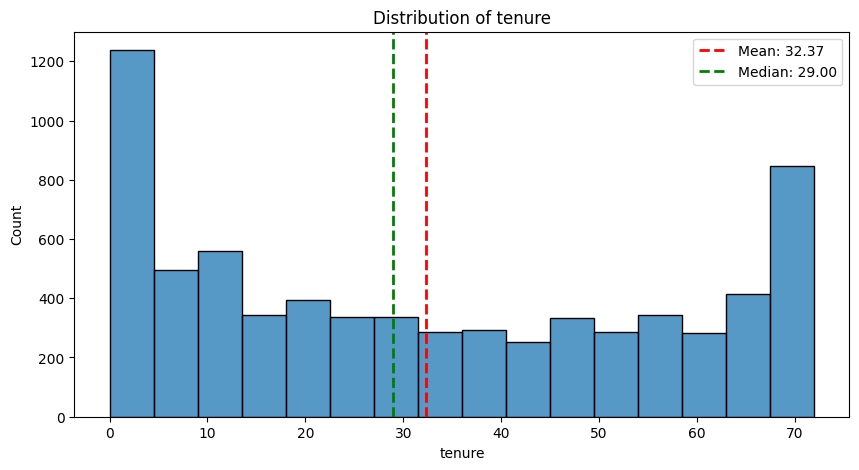

In [18]:
distribution_of_numerical_features(cus_data,'tenure')

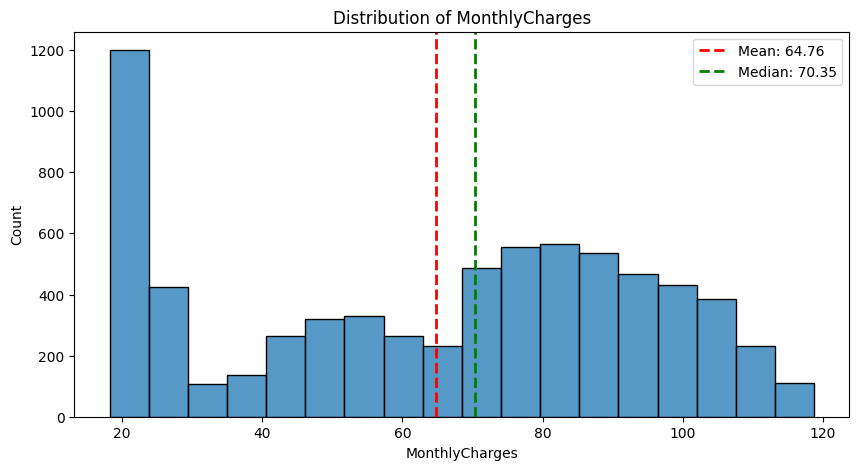

In [19]:
distribution_of_numerical_features(cus_data,'MonthlyCharges')

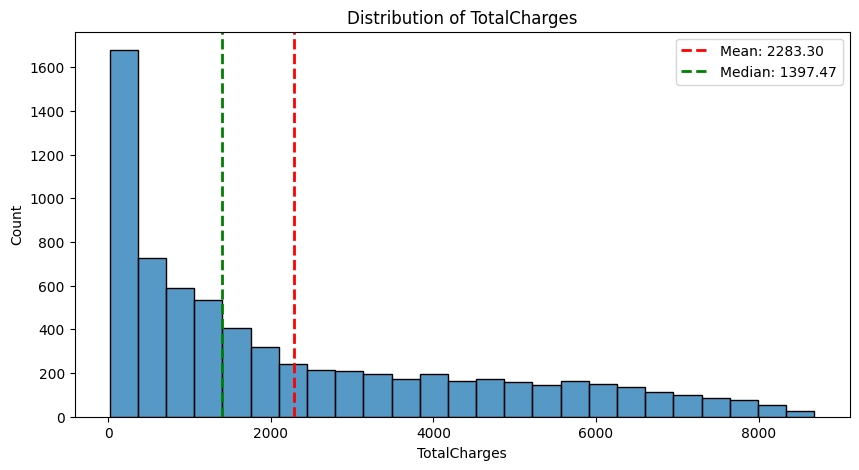

In [20]:
distribution_of_numerical_features(cus_data,'TotalCharges')

In [21]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[column_name])
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.title(f'Distribution of {column_name}')
  plt.show()

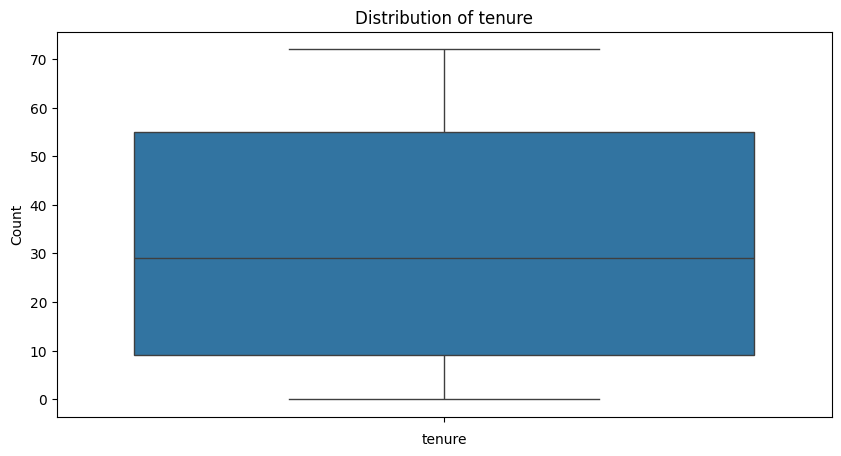

In [22]:
plot_boxplot(cus_data,'tenure')

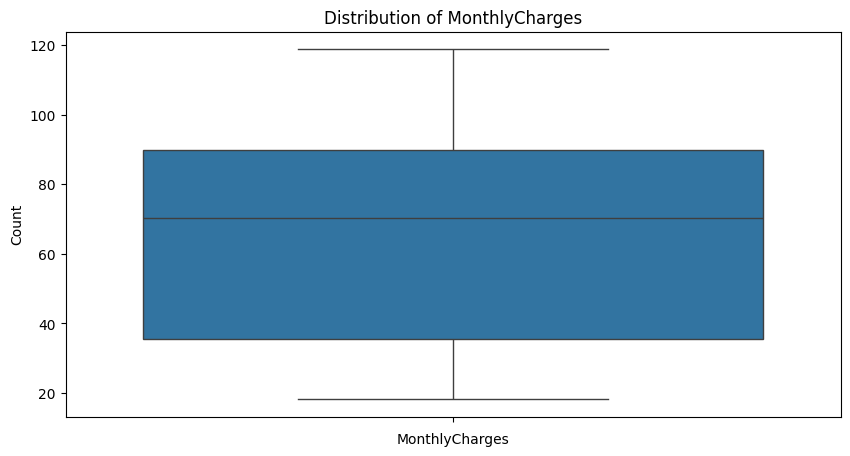

In [23]:
plot_boxplot(cus_data,'MonthlyCharges')

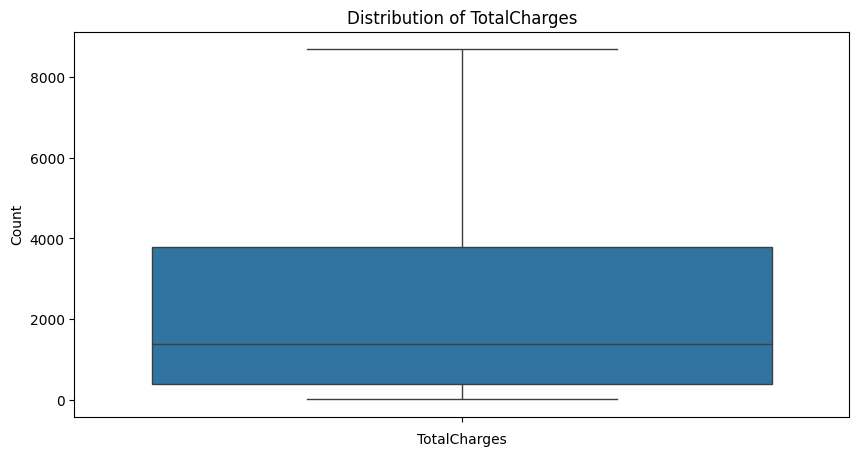

In [24]:
plot_boxplot(cus_data,'TotalCharges')

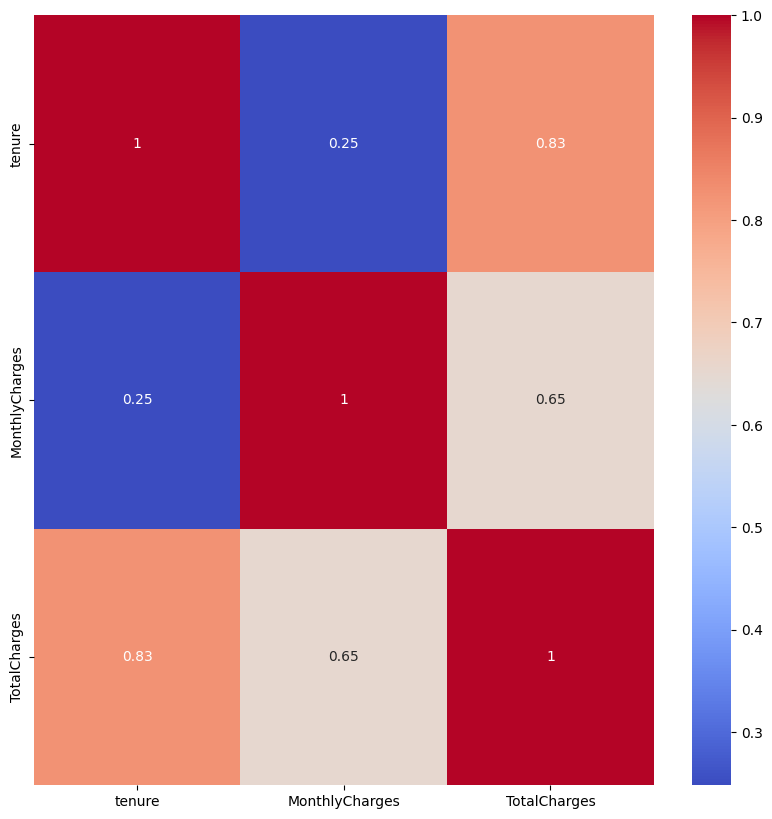

In [25]:
# Correlatioj matrix and heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cus_data[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm')
plt.show()

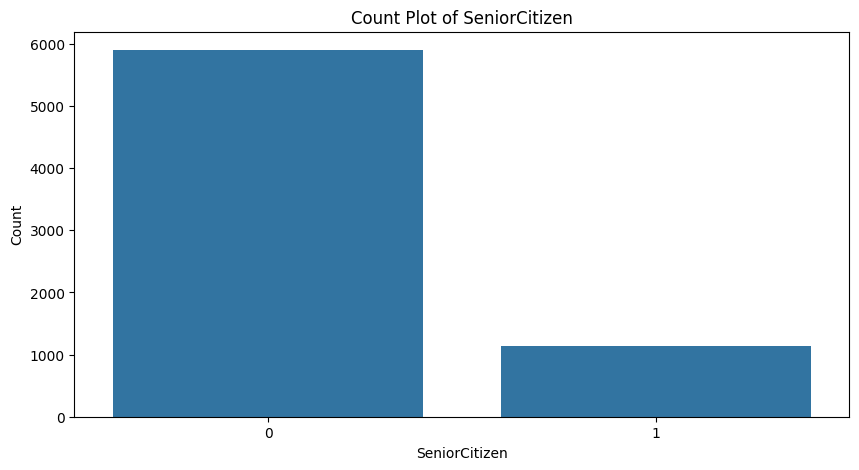

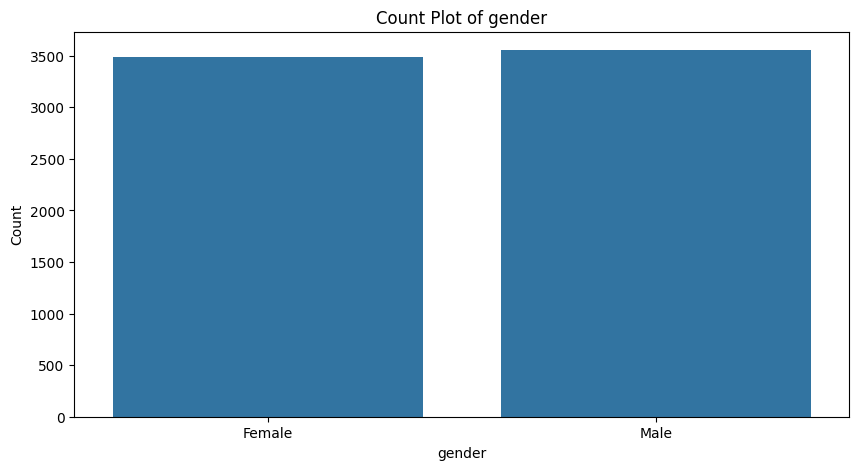

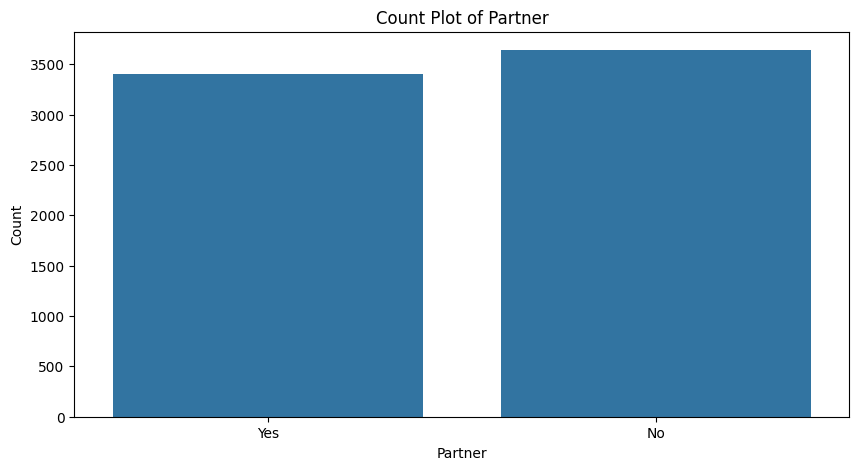

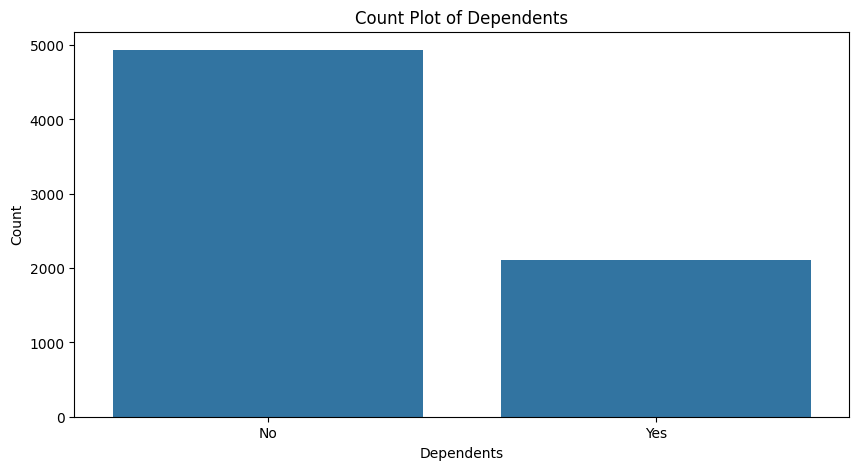

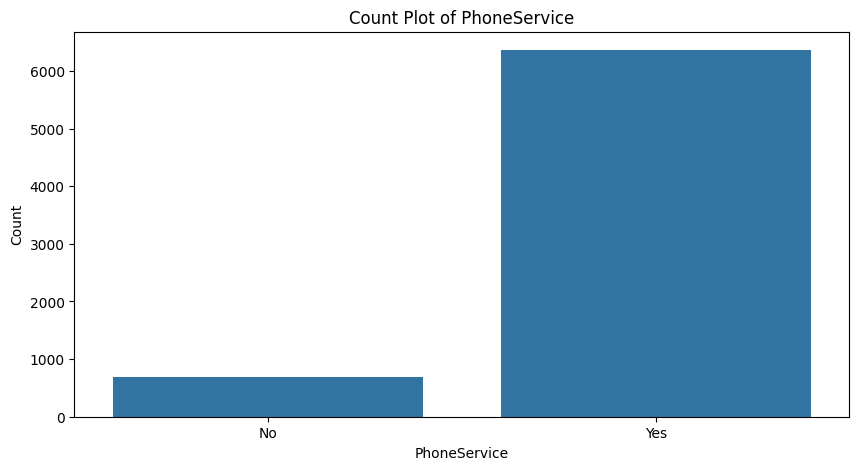

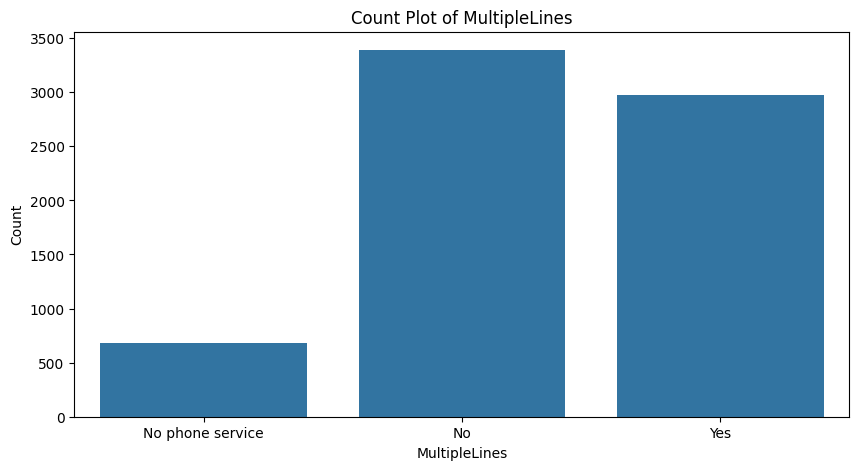

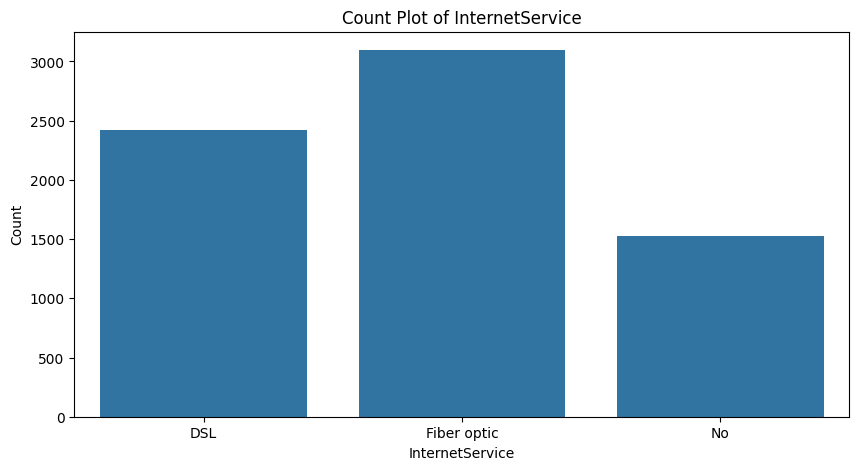

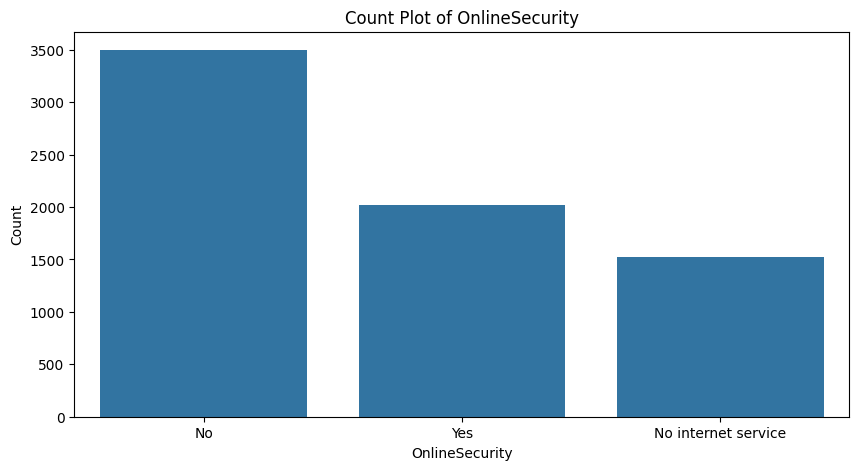

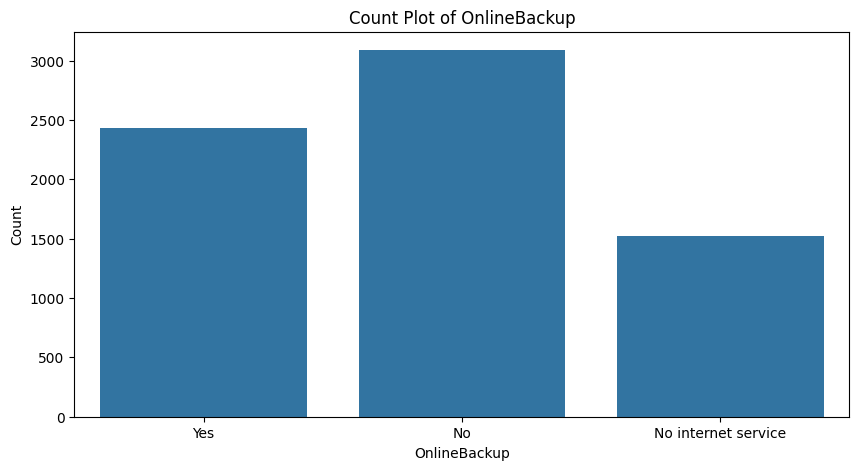

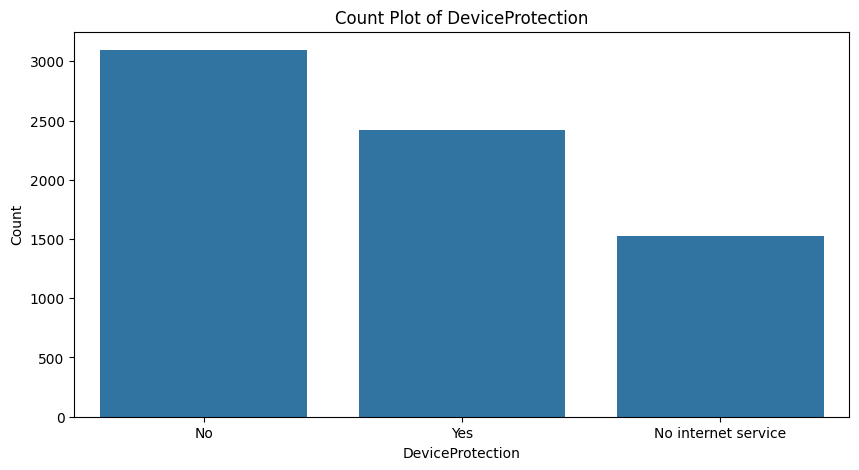

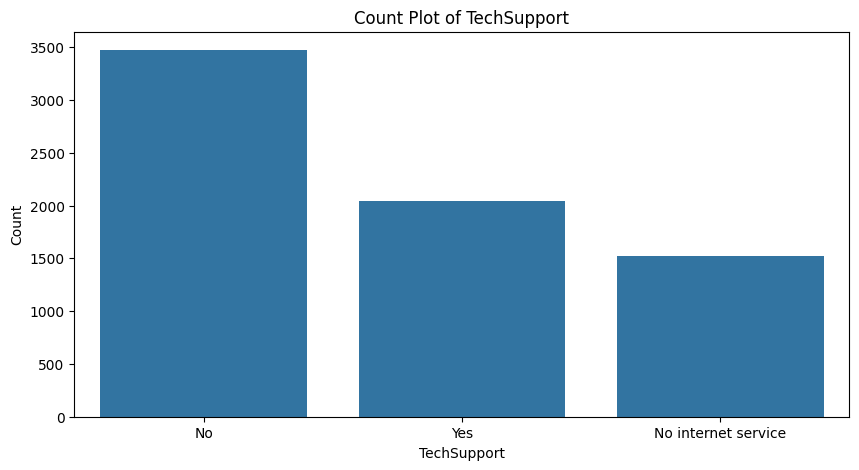

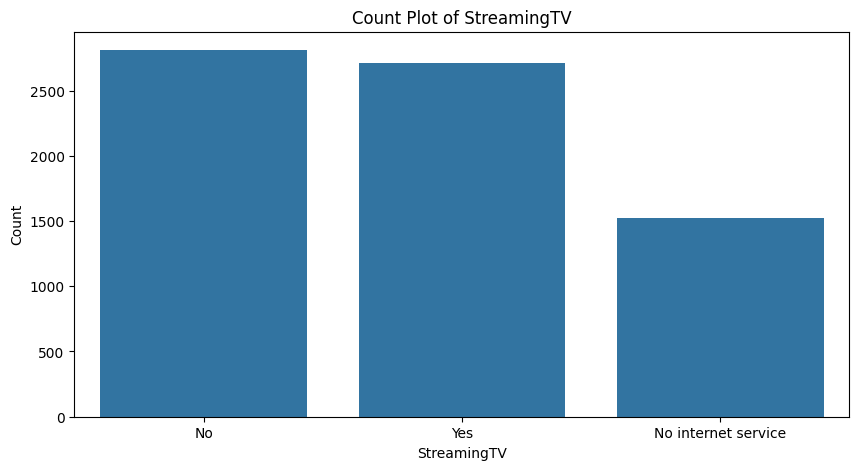

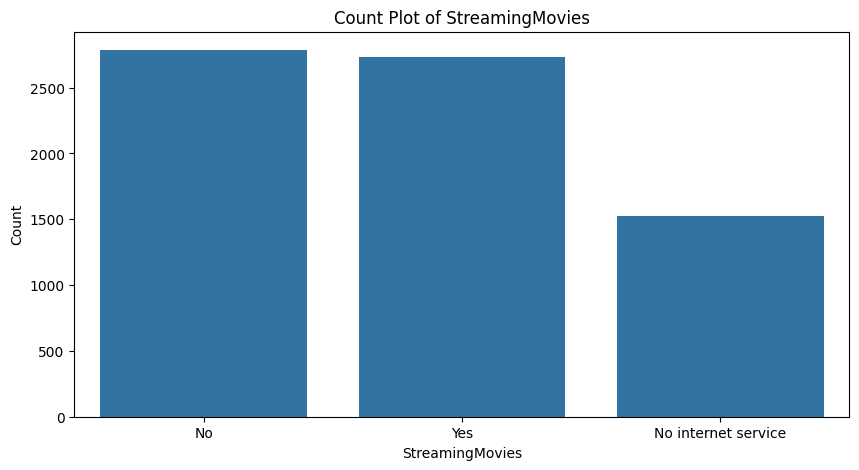

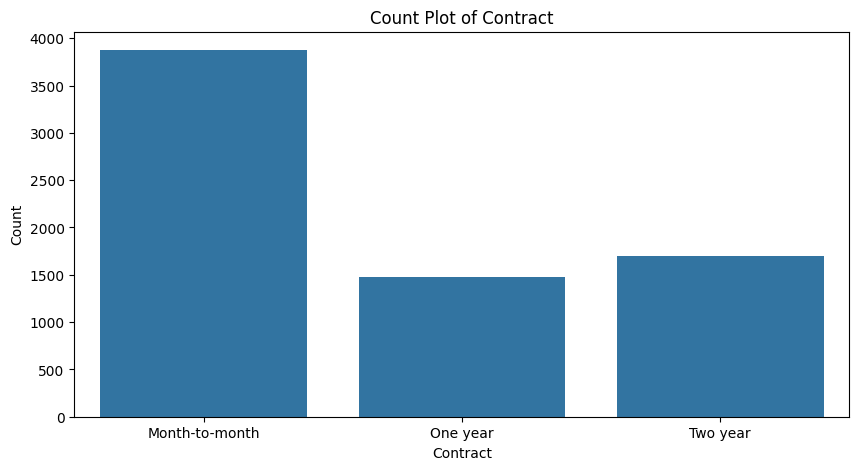

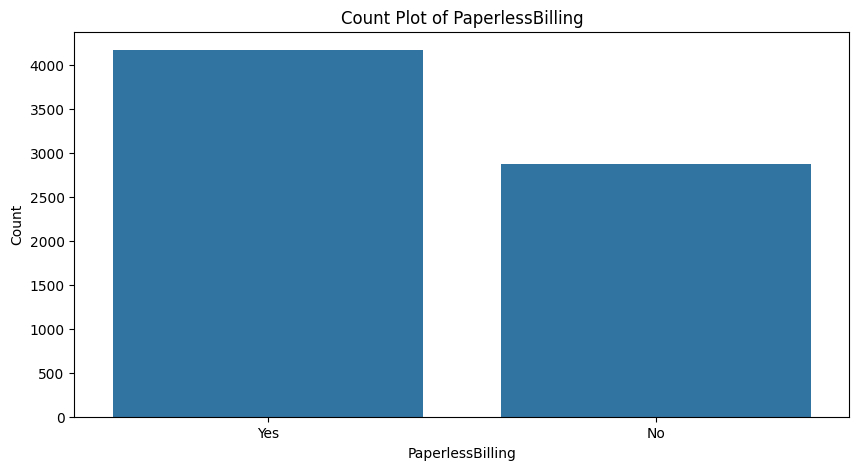

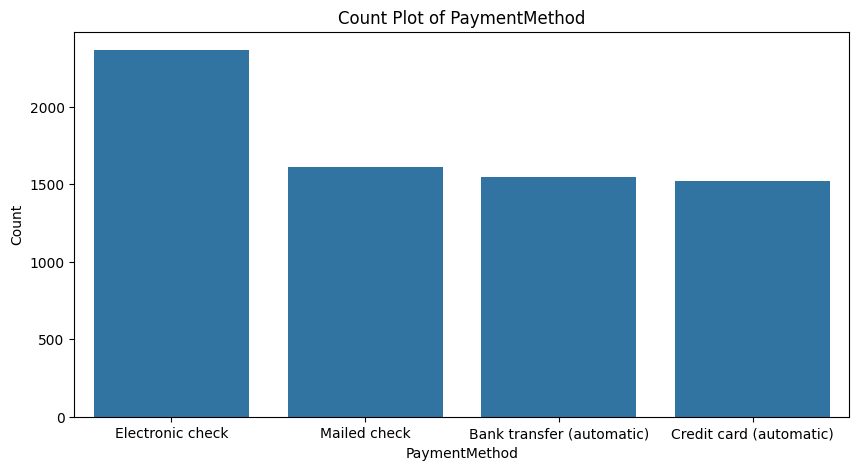

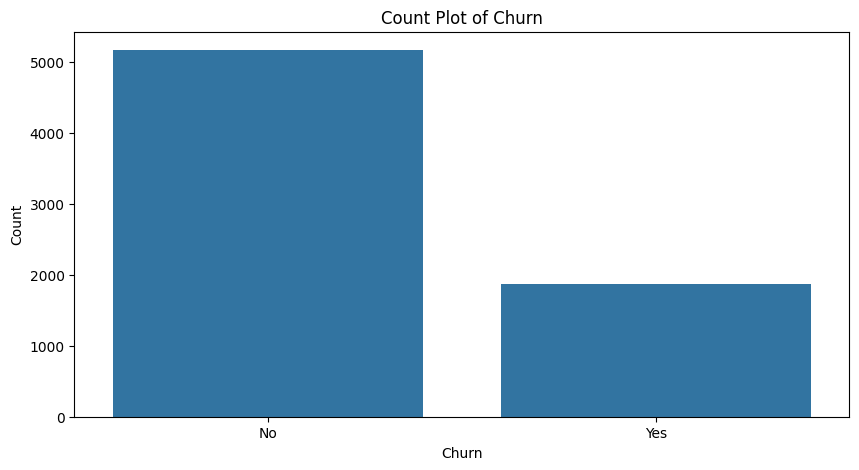

In [26]:
# Categorical Features analysis
object_cols=cus_data.select_dtypes(include='object').columns.to_list()
object_cols=['SeniorCitizen']+object_cols

for i in object_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=cus_data[i])
  plt.title(f'Count Plot of {i}')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.show()

In [27]:
# Data Preprocessing
cus_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
cus_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [29]:
object_columns=cus_data.select_dtypes(include='object').columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [30]:
le=LabelEncoder()
encoder= {}
for col in object_columns:
    cus_data[col]=le.fit_transform(cus_data[col])
    encoder[col] = le

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [31]:
cus_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [32]:
encoder


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [33]:
# Handling imbalance data
X=cus_data.drop('Churn',axis=1)
y=cus_data['Churn']

In [34]:
# split training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# split training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# print value counts of training and testing target variables
print("Value counts for y_train:")
print(y_train.value_counts())
print("\nValue counts for y_test:")
print(y_test.value_counts())

Value counts for y_train:
Churn
0    4138
1    1496
Name: count, dtype: int64

Value counts for y_test:
Churn
0    1036
1     373
Name: count, dtype: int64


In [36]:
# Handle missing values in x_train before applying SMOTE
# Dropping rows with NaN values
x_train_cleaned = x_train.dropna()
y_train_cleaned = y_train[x_train_cleaned.index] # Align y_train with cleaned x_train

smote=SMOTE(random_state=42) # Added random_state for reproducibility
x_train_smote,y_train_smote=smote.fit_resample(x_train_cleaned,y_train_cleaned)

# Print value counts after SMOTE to check balance
print("Value counts for y_train_smote after SMOTE:")
print(y_train_smote.value_counts())

Value counts for y_train_smote after SMOTE:
Churn
0    4128
1    4128
Name: count, dtype: int64


In [37]:
# Model Training
# Training with default hyperparameters
models={
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42)
}
cv_scores={}


for name,model in models.items():
    print(f"Training {name} with defaultparameters")
    cv_score=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_scores[name]=cv_score
    print(f"CV Score: {cv_score}")

    print(f"{name} cross validation score: {cv_score.mean():.2f}")
    print("-"*80)



Training DecisionTree with defaultparameters
CV Score: [0.69552058 0.71714113 0.8322229  0.83525136 0.84494246]
DecisionTree cross validation score: 0.79
--------------------------------------------------------------------------------
Training RandomForest with defaultparameters
CV Score: [0.73849879 0.76256814 0.90308904 0.88976378 0.89521502]
RandomForest cross validation score: 0.84
--------------------------------------------------------------------------------
Training XGBoost with defaultparameters
CV Score: [0.71186441 0.76438522 0.90066626 0.89460933 0.8976378 ]
XGBoost cross validation score: 0.83
--------------------------------------------------------------------------------


In [38]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


In [39]:
rfclassifier=RandomForestClassifier(random_state=42)
rfclassifier.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [40]:
# evaluate test data
y_pred=rfclassifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

[[877 159]
 [157 216]]
0.7757274662881476


In [41]:
# save the trained model as pickle file
model_data = {
    'model': rfclassifier,
    'feature_names': X.columns.tolist(),
    }

with open('rfclassifier.pkl','wb') as f:
  pickle.dump(model_data,f)

In [42]:
# Load the saved model and build a predictive system

with open('/content/rfclassifier.pkl','rb') as f:
  model_data=pickle.load(f)

model=model_data['model']
feature_names=model_data['feature_names']

In [43]:
print(model)

RandomForestClassifier(random_state=42)


In [44]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [46]:
# Predictive System
input_data={
    'gender':1,
    'SeniorCitizen':0,
    'Partner':1,
    'Dependents':1,
    'tenure':2,
    'PhoneService':1,
    'MultipleLines':0,
    'InternetService': 0, # Added a placeholder value
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'Contract': 0,
    'PaperlessBilling': 0,
    'PaymentMethod': 0,
    'MonthlyCharges': 0.0,
    'TotalCharges': 0.0
}
input_data_df=pd.DataFrame([input_data])
input_data_df


In [47]:
# Convert the input data to a pandas DataFrame
input_data_df = pd.DataFrame([input_data])

# Ensure the order of columns in the input data matches the training data
input_data_df = input_data_df[feature_names]

# Make a prediction
prediction = model.predict(input_data_df)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts that this customer is likely to churn.")
else:
    print("The model predicts that this customer is not likely to churn.")

The model predicts that this customer is not likely to churn.
